In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = np.random.uniform(0, 1, 200).reshape(-1, 1)
Y = 3 * X + 5 + np.random.uniform(-0.1, 0.1, 200).reshape(-1, 1)

In [3]:
X.shape

(200, 1)

In [4]:
Y.shape

(200, 1)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle = True)

In [7]:
x_train.shape

(160, 1)

In [4]:
model = LinearRegression()


In [5]:
model.fit(x_train, y_train)


LinearRegression()

In [6]:
y_pred = model.predict(x_test)

In [7]:
mse = mean_squared_error(y_test, y_pred)
mse

0.003608623868682106

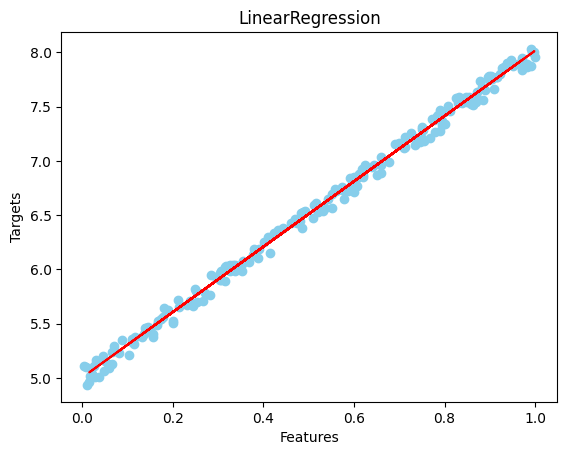

In [8]:
plt.scatter(X.flatten(), Y.flatten(), color = 'skyblue')
plt.plot(x_test.flatten(), y_pred.flatten(), c = 'red')
plt.xlabel('Features')
plt.ylabel('Targets')
plt.title('LinearRegression')
plt.show()

<Axes: >

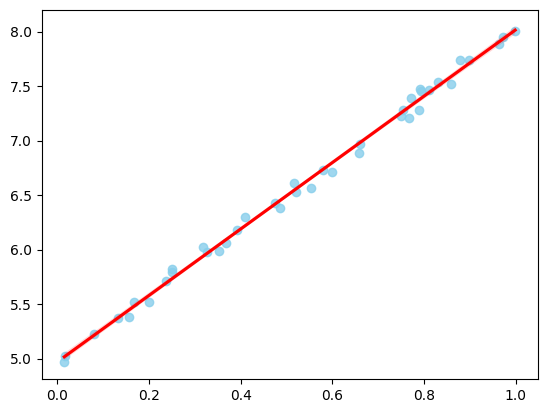

In [9]:
sns.regplot(x = x_test.flatten(), y = y_test.flatten(), scatter_kws = {'color': 'skyblue'}, line_kws = {'color':'red'})

In [10]:
model.coef_

array([[3.01109306]])

In [11]:
model.intercept_

array([5.00484275])

In [18]:
x_train

array([[0.53373402],
       [0.74832147],
       [0.41502348],
       [0.0557452 ],
       [0.82547757],
       [0.92754305],
       [0.94575477],
       [0.5902976 ],
       [0.18130894],
       [0.6064656 ],
       [0.10275263],
       [0.61798026],
       [0.99070016],
       [0.03574734],
       [0.79456123],
       [0.30546893],
       [0.78603113],
       [0.33760743],
       [0.90364165],
       [0.53211393],
       [0.30545392],
       [0.24511894],
       [0.32373567],
       [0.1441245 ],
       [0.54343493],
       [0.3381259 ],
       [0.37936436],
       [0.86936535],
       [0.61027674],
       [0.88270207],
       [0.63945431],
       [0.8534824 ],
       [0.14932561],
       [0.91666804],
       [0.98131024],
       [0.72598356],
       [0.01066868],
       [0.93805614],
       [0.55060582],
       [0.04847343],
       [0.49062776],
       [0.93157493],
       [0.78248591],
       [0.75039392],
       [0.8684733 ],
       [0.40151129],
       [0.88914669],
       [0.846

In [9]:
n_features = x_train.shape[1]
w = np.zeros(n_features)  # вектор весов shape (n_features,)
b = 0.0                    # свободный член
eta = 0.05                 # learning rate
n = x_train.shape[0]       # число обучающих примеров
max_iter = 1000            # число итераций
for i in range(max_iter):
    # 1. Предсказания
    y_pred = x_train @ w + b  # shape (n_samples,)

    # 2. Ошибка
    error = y_pred - y_train   # shape (n_samples,)

    # 3. Градиенты
    dw = (2/n) * (x_train.T @ error)  # shape (n_features,)
    db = (2/n) * np.sum(error)        # скаляр

    # 4. Обновление параметров
    w -= eta * dw
    b -= eta * db

    # 5. Проверка на NaN/Inf
    if np.isnan(w).any() or np.isinf(w).any() or np.isnan(b) or np.isinf(b):
        print(f"Взрыв градиента на шаге {i}")
        break

    # 6. Опционально: вывод прогресса каждые 100 итераций
    if i % 100 == 0:
        mse = np.mean(error**2)
        print(f"Итерация {i}: MSE={mse:.6f}")


ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (1,160)

In [8]:
print(x_train.shape)

(160, 1)


In [4]:
w, b = 0.0, 0.0
eta = 0.05   # можно чуть больше, потому что данные маленькие
n = x_train.shape[0]

for i in range(1000):
    # 1. Предсказания
    y_pred = x_train @ w + b  # shape (n_samples,)

    # 2. Ошибка
    error = y_pred - y_train   # shape (n_samples,)

    # 3. Градиенты
    dw = (2/n) * (x_train @ error)  # shape (n_features,)
    db = (2/n) * np.sum(error)        # скаляр

    # 4. Обновление параметров
    w -= eta * dw
    b -= eta * db

    # 5. Проверка на NaN/Inf
    if np.isnan(w).any() or np.isinf(w).any() or np.isnan(b) or np.isinf(b):
        print(f"Взрыв градиента на шаге {i}")
        break

    # 6. Опционально: вывод прогресса каждые 100 итераций
    if i % 100 == 0:
        mse = np.mean(error**2)
        print(f"Итерация {i}: MSE={mse:.6f}")


print("w:", w)
print("b:", b)


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [78]:
w, b = 0, 0
eta = 0.01
n = len(x_train[:, 0])
for i in range(2000):
  y_pred_tr = x_train @ np.array([w]) + b
  error = y_pred_tr - y_train
  dw = (2 / n) * np.sum(error * x_train)
  db = (2 / n) * np.sum(error * 1)
  w = w - eta * dw
  b = b - eta * db
  if np.isnan(w) or np.isinf(w):
        print("Взрыв градиента на шаге", i)
        break

Взрыв градиента на шаге 935


/tmp/ipython-input-3976958167.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  b = b - eta * db


In [13]:
w

array([[0.99145264]])

In [14]:
b

np.float64(-1.1123046927963211e-16)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

x_train = scaler_X.fit_transform(x_train)
y_train= scaler_y.fit_transform(y_train)

In [79]:
w, b = 0, 0
eta = 0.001
n = len(x_train)

for i in range(10000):
    y_pred = x_train @ np.array([w]) + b
    error = y_pred - y_train

    dw = (2 / n) * np.sum(error * x_train)   # без минуса
    db = (2 / n) * np.sum(error)            # без минуса

    w = w - eta * dw
    b = b - eta * db

    if np.isnan(w) or np.isinf(w):
        print("Взрыв градиента на шаге", i)
        break


In [91]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_X.fit_transform(x_train)
y_train_scaled = scaler_y.fit_transform(y_train)
w = np.array([[0.0]])
b = 0
eta = 0.01
n = len(x_train_scaled)

for i in range(10000):
    y_pred = x_train_scaled @ w + b
    error = y_pred - y_train_scaled
    dw = (2 / n) * np.sum(error * x_train_scaled)
    db = (2 / n) * np.sum(error)

    w -= eta * dw
    b -= eta * db


In [12]:
# import numpy as np
# from sklearn.preprocessing import StandardScaler

# # Масштабирование
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# x_train_scaled = scaler_X.fit_transform(x_train)  # (n_samples,1)
# y_train_scaled = scaler_y.fit_transform(y_train)  # (n_samples,1)

w = np.array([[0.0]])  # shape (1,1)
b = 0.0
eta = 0.01
n = x_train_scaled.shape[0]

for i in range(10000):
    y_pred = x_train_scaled @ w + b   # shape (n_samples,1)
    error = y_pred - y_train_scaled   # shape (n_samples,1)

    dw = (2/n) * np.sum(x_train_scaled * error, axis=0, keepdims=True)  # shape (1,)
    db = (2/n) * np.sum(error)  # скаляр

    w -= eta * dw.reshape(1,1)   # приводим dw к форме (1,1)
    b -= eta * db

    if np.isnan(w).any() or np.isinf(w).any():
        print("Взрыв градиента на шаге", i)
        break


Итерация 0: MSE=456.959901, w=0.239119, b=0.038902
Итерация 1000: MSE=3.301449, w=3.391099, b=2.410972
Итерация 2000: MSE=2.062316, w=3.225278, b=3.498355
Итерация 3000: MSE=1.633490, w=3.127730, b=4.138037
Итерация 4000: MSE=1.485087, w=3.070344, b=4.514346
Итерация 5000: MSE=1.433729, w=3.036586, b=4.735720
Итерация 6000: MSE=1.415956, w=3.016727, b=4.865950
Итерация 7000: MSE=1.409805, w=3.005044, b=4.942560
Итерация 8000: MSE=1.407676, w=2.998171, b=4.987629
Итерация 9000: MSE=1.406940, w=2.994128, b=5.014141

Test MSE: 1.2060502118102832
Final w: 2.991751341654329 b: 5.029726281439158


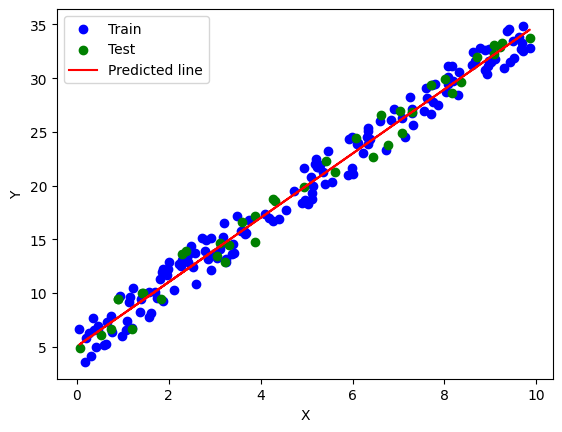

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ---------------------------
# 1️⃣ Генерация данных
# ---------------------------
np.random.seed(42)
n_samples = 200
X = np.random.uniform(0, 10, n_samples).reshape(-1,1)  # один признак
true_w = 3.0
true_b = 5.0
Y = true_w * X[:,0] + true_b + np.random.uniform(-2, 2, n_samples)  # шум ±2

# Разделяем на train/test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ---------------------------
# 2️⃣ Инициализация градиентного спуска
# ---------------------------
w = 0.0
b = 0.0
eta = 0.001       # шаг обучения
n = x_train.shape[0]
max_iter = 10000

# ---------------------------
# 3️⃣ Градиентный спуск
# ---------------------------
for i in range(max_iter):
    # Предсказания
    y_pred = w * x_train[:,0] + b

    # Ошибка
    error = y_pred - y_train

    # Градиенты
    dw = (2/n) * np.sum(error * x_train[:,0])
    db = (2/n) * np.sum(error)

    # Обновление параметров
    w -= eta * dw
    b -= eta * db

    # Проверка на Inf/NaN
    if np.isnan(w) or np.isnan(b) or np.isinf(w) or np.isinf(b):
        print(f"Взрыв градиента на шаге {i}")
        break

    # Прогресс каждые 1000 итераций
    if i % 1000 == 0:
        mse = np.mean(error**2)
        print(f"Итерация {i}: MSE={mse:.6f}, w={w:.6f}, b={b:.6f}")

# ---------------------------
# 4️⃣ MSE на тесте
# ---------------------------
y_test_pred = w * x_test[:,0] + b
mse_test = np.mean((y_test_pred - y_test)**2)
print("\nTest MSE:", mse_test)
print("Final w:", w, "b:", b)

# ---------------------------
# 5️⃣ Визуализация
# ---------------------------
plt.scatter(x_train, y_train, color='blue', label='Train')
plt.scatter(x_test, y_test, color='green', label='Test')
plt.plot(x_train, w * x_train + b, color='red', label='Predicted line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


Итерация 0: MSE=456.959901, w=0.239119, b=0.038902
Итерация 1000: MSE=3.301449, w=3.391099, b=2.410972
Итерация 2000: MSE=2.062316, w=3.225278, b=3.498355
Итерация 3000: MSE=1.633490, w=3.127730, b=4.138037
Итерация 4000: MSE=1.485087, w=3.070344, b=4.514346
Итерация 5000: MSE=1.433729, w=3.036586, b=4.735720
Итерация 6000: MSE=1.415956, w=3.016727, b=4.865950
Итерация 7000: MSE=1.409805, w=3.005044, b=4.942560
Итерация 8000: MSE=1.407676, w=2.998171, b=4.987629
Итерация 9000: MSE=1.406940, w=2.994128, b=5.014141

Test MSE: 1.2060502118102832
Final w: 2.991751341654329 b: 5.029726281439158


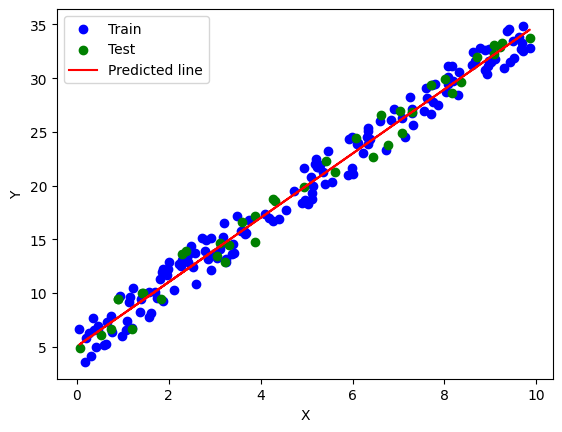

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ---------------------------
# 1️⃣ Генерация данных
# ---------------------------
np.random.seed(42)
n_samples = 200
X = np.random.uniform(0, 10, n_samples).reshape(-1,1)  # один признак
true_w = 3.0
true_b = 5.0
Y = X @ np.array([[true_w]]) + true_b + np.random.uniform(-2, 2, (n_samples,1))  # шум ±2

# Разделение на train/test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ---------------------------
# 2️⃣ Инициализация градиентного спуска
# ---------------------------
w = np.zeros((1,1))  # вес в виде 2D массива (1,1) для @
b = 0.0
eta = 0.001
n = x_train.shape[0]
max_iter = 10000

# ---------------------------
# 3️⃣ Градиентный спуск с @
# ---------------------------
for i in range(max_iter):
    # Предсказания
    y_pred = x_train @ w + b  # shape (n,1)

    # Ошибка
    error = y_pred - y_train   # shape (n,1)

    # Градиенты
    dw = (2/n) * (x_train.T @ error)  # shape (1,1)
    db = (2/n) * np.sum(error)        # скаляр

    # Обновление параметров
    w -= eta * dw
    b -= eta * db

    # Проверка на Inf/NaN
    if np.isnan(w).any() or np.isnan(b) or np.isinf(w).any() or np.isinf(b):
        print(f"Взрыв градиента на шаге {i}")
        break

    # Прогресс каждые 1000 итераций
    if i % 1000 == 0:
        mse = np.mean(error**2)
        print(f"Итерация {i}: MSE={mse:.6f}, w={w[0,0]:.6f}, b={b:.6f}")

# ---------------------------
# 4️⃣ MSE на тесте
# ---------------------------
y_test_pred = x_test @ w + b
mse_test = np.mean((y_test_pred - y_test)**2)
print("\nTest MSE:", mse_test)
print("Final w:", w[0,0], "b:", b)

# ---------------------------
# 5️⃣ Визуализация
# ---------------------------
plt.scatter(x_train, y_train, color='blue', label='Train')
plt.scatter(x_test, y_test, color='green', label='Test')
plt.plot(x_train, x_train @ w + b, color='red', label='Predicted line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
